In [1]:
import cv2
import numpy as np
import torch
from albumentations import (
    Compose, HorizontalFlip,VerticalFlip, RandomRotate90, ShiftScaleRotate, 
    RandomBrightnessContrast, HueSaturationValue, 
    GaussNoise, Blur, RandomCrop
)
from albumentations.pytorch import ToTensorV2

# Define your transformations
def get_transform():
    return Compose([
        HorizontalFlip(p=0.5),  # Randomly flip image and mask
        RandomRotate90(p=0.5),  # Rotate image and mask 90 degrees
        VerticalFlip(p=0.5),
        #ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),  # Scale, rotate, and shift
        RandomBrightnessContrast(p=0.2),  # Adjust brightness and contrast
        HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.2),  # Adjust hue, saturation, value
        GaussNoise(var_limit=(10.0, 50.0), p=0.2),  # Add Gaussian noise
        Blur(blur_limit=3, p=0.2),  # Apply blur to the image
        #RandomCrop(width=256, height=256, p=1.0),  # Crop the image and mask to the desired size
        ToTensorV2(),  # Convert the image and mask to PyTorch tensors
    ])

# Function to apply transformations to an image and its mask
def apply_transforms(image, mask, transform):
    augmented = transform(image=image, mask=mask)
    return augmented['image'], augmented['mask']

# Example of loading and transforming an image and its segmentation mask
#image_path = "path_to_image.jpg"
#mask_path = "path_to_mask.png"

# Load your image and mask (make sure mask is grayscale or in the same format)
#image = cv2.imread(image_path)  # Read image
#mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale

# Get the transform
#transform = get_transform()

# Apply the transformations
#augmented_image, augmented_mask = apply_transforms(image, mask, transform)

# Convert to tensors
#print(augmented_image.shape)  # Check the shape of the augmented image tensor
#print(augmented_mask.shape)   # Check the shape of the augmented mask tensor


C:\Users\raoak\AppData\Local\Temp\ipykernel_10920\3073390377.py:20: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  GaussNoise(var_limit=(10.0, 50.0), p=0.2),  # Add Gaussian noise


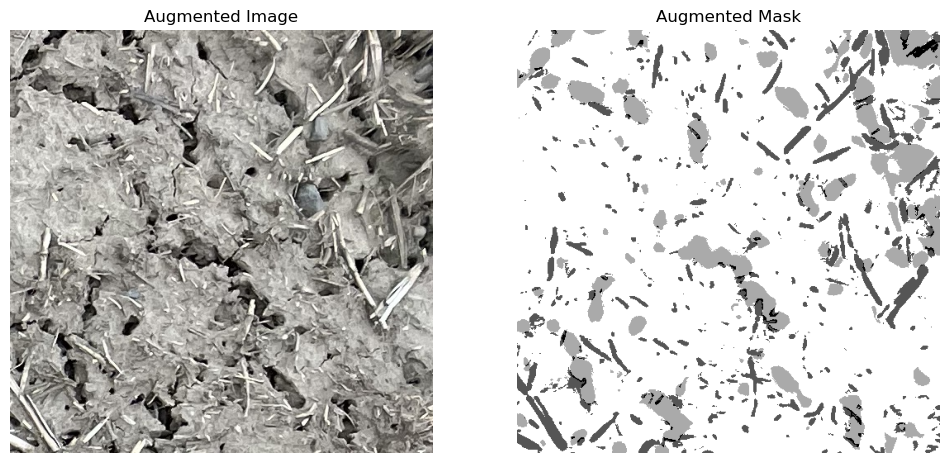

(512, 512, 3)
(512, 512)


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_image_and_mask(image, mask):
    # Convert the image to RGB (if it's not already)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image and mask
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show the image on the first subplot
    ax[0].imshow(image_rgb)
    ax[0].set_title("Augmented Image")
    ax[0].axis('off')

    # Show the mask on the second subplot
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Augmented Mask")
    ax[1].axis('off')

    plt.show()

# Example of loading and transforming an image and its segmentation mask
image_path = "goodData/Images/IMG_0632_part01.jpg"
mask_path = "goodData/Masks/IMG_0632_part01.tif"

# Load your image and mask
image = cv2.imread(image_path)  # Read image
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale

# Get the transform
transform = get_transform()

# Apply the transformations
augmented_image, augmented_mask = apply_transforms(image, mask, transform)

# Convert to numpy arrays for visualization (if they are tensors)
augmented_image = augmented_image.numpy().transpose(1, 2, 0)  # Convert from CHW to HWC
augmented_mask = augmented_mask.numpy()  # Mask should remain 2D

# Display the augmented image and mask
show_image_and_mask(augmented_image, augmented_mask)
print(augmented_image.shape)  # Check the shape of the augmented image tensor
print(augmented_mask.shape)   # Check the shape of the augmented mask tensor


In [3]:
import os
from PIL import Image
augmented_image_dir = 'augmented_images/'
augmented_mask_dir = 'augmented_masks/'

os.makedirs(augmented_image_dir, exist_ok=True)
os.makedirs(augmented_mask_dir, exist_ok=True)
def save_augmented_data(augmented_image, augmented_mask, image_idx, mask_idx, transform):
    #augmented = transform(image=image, mask=mask)
    
    # Save the augmented image
    #augmented_image = augmented['image']
    augmented_image = augmented_image.numpy().transpose(1, 2, 0)  # Convert back from tensor
    augmented_image = np.clip(augmented_image, 0, 255).astype(np.uint8)  # Ensure the pixel range is correct
    
    augmented_mask = augmented_mask.numpy()  # Convert tensor to numpy
    augmented_mask = np.clip(augmented_mask, 0, 255).astype(np.uint8)  # Ensure mask is in proper range

    
    image_filename = f"augmented_image_{image_idx}.jpg"
    mask_filename = f"augmented_mask_{mask_idx}.tif"
    
    cv2.imwrite(os.path.join(augmented_image_dir, image_filename), augmented_image)
    # Save mask using PIL (for .tif format)
    mask_filename = f"augmented_mask_{mask_idx}.tif"
    mask_image = Image.fromarray(augmented_mask)  # Convert numpy array to PIL Image
    mask_image.save(os.path.join(augmented_mask_dir, mask_filename), format='TIFF')

In [7]:
import os
import random
import cv2
import numpy as np

# Assuming these functions are already defined
# def get_transform():  # Returns augmentation pipeline
# def apply_transforms(image, mask, transform):  # Applies transform to the image and mask
# def save_augmented_data(image, mask, image_idx, mask_idx, transform):  # Saves augmented data to disk

def augment_and_save_data(image_folder, mask_folder, augmented_image_dir, augmented_mask_dir, num_augments):
    """
    Function that randomly picks an image and its corresponding mask, 
    performs data augmentation on it, and saves the augmented images to disk.

    Args:
    - image_folder (str): Path to the folder containing the original images.
    - mask_folder (str): Path to the folder containing the original masks.
    - augmented_image_dir (str): Directory to save augmented images.
    - augmented_mask_dir (str): Directory to save augmented masks.
    - num_augments (int): Number of augmented versions to generate for each image.
    """
    # Ensure output directories exist
    os.makedirs(augmented_image_dir, exist_ok=True)
    os.makedirs(augmented_mask_dir, exist_ok=True)

    # Get list of image and mask filenames
    image_filenames = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    mask_filenames = [f for f in os.listdir(mask_folder) if f.endswith('.tif')]
    
    # Ensure that image and mask filenames match
    if len(image_filenames) != len(mask_filenames):
        print(len(image_filenames))
        print(len(mask_filenames))
        print("The number of images and masks do not match!")
        return

    # Loop through and augment
    for _ in range(num_augments):
        # Randomly pick an image index
        idx = random.randint(0, len(image_filenames) - 1)
        
        # Get the image and mask paths
        image_path = os.path.join(image_folder, image_filenames[idx])
        mask_path = os.path.join(mask_folder, mask_filenames[idx])
        
       # print("Chosen Image ")
   #     print(image_path)

        # Load the image and mask
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Get the augmentation transform
        transform = get_transform()

        # Apply the transformation to the image and mask
        augmented_image, augmented_mask = apply_transforms(image, mask, transform)

        # Save the augmented image and mask to disk
        save_augmented_data(augmented_image, augmented_mask, image_idx=_, mask_idx=_, transform=transform)
        
        print(f"Augmented image {image_filenames[idx]} saved.")

    print(f"Generated {num_augments} augmented images and masks.")

# Example usage
image_folder = 'goodData/Images/'
mask_folder = 'goodData/ModMasks/'
augmented_image_dir = 'augmented/Images'
augmented_mask_dir = 'augmented/Masks'

# Perform 5 augmentations for each randomly selected image
augment_and_save_data(image_folder, mask_folder, augmented_image_dir, augmented_mask_dir, num_augments=200)


C:\Users\raoak\AppData\Local\Temp\ipykernel_10920\3073390377.py:20: UserWarning: Argument 'var_limit' is not valid and will be ignored.
  GaussNoise(var_limit=(10.0, 50.0), p=0.2),  # Add Gaussian noise


Augmented image IMG_0786_part15.jpg saved.
Augmented image IMG_0635_part16.jpg saved.
Augmented image IMG_0807_part10.jpg saved.
Augmented image IMG_0889_part09.jpg saved.
Augmented image IMG_0942_part06.jpg saved.
Augmented image IMG_0895_part16.jpg saved.
Augmented image IMG_0629_part06.jpg saved.
Augmented image IMG_0783_part10.jpg saved.
Augmented image IMG_0816_part01.jpg saved.
Augmented image IMG_0896_part09.jpg saved.
Augmented image IMG_0807_part15.jpg saved.
Augmented image IMG_0893_part11.jpg saved.
Augmented image IMG_0782_part14.jpg saved.
Augmented image IMG_0940_part12.jpg saved.
Augmented image IMG_0896_part13.jpg saved.
Augmented image IMG_0786_part15.jpg saved.
Augmented image IMG_0638_part10.jpg saved.
Augmented image IMG_0889_part01.jpg saved.
Augmented image IMG_0816_part01.jpg saved.
Augmented image IMG_0630_part13.jpg saved.
Augmented image IMG_0897_part04.jpg saved.
Augmented image IMG_0890_part02.jpg saved.
Augmented image IMG_0809_part06.jpg saved.
Augmented i

Augmented image IMG_0783_part14.jpg saved.
Augmented image IMG_0941_part15.jpg saved.
Augmented image IMG_0942_part15.jpg saved.
Augmented image IMG_0941_part13.jpg saved.
Augmented image IMG_0782_part05.jpg saved.
Augmented image IMG_0789_part14.jpg saved.
Augmented image IMG_0629_part12.jpg saved.
Generated 200 augmented images and masks.
